# Data Cleaning & Data Wrangling

Todos los datasets fueron hechos por Ivo Matus Norambuena, usando la API del controlador RYU en ubuntu 20.04, usando los archivos crear_dataset_benigno.py y crear_dataset_ddos.py, scripts basados en el traffic_monitor.py

El comando utilizado en mininet (versión 2.2.2) fue  mn --topo=linear,4 --controller=remote    

Linear,4 son 4 switches con 1 host cada uno.


In [1]:
import pandas as pd 
import numpy as np

In [2]:
data1 = pd.read_csv("dataset_flowstats.csv") # icmp flood test
data2 = pd.read_csv("benigno_flowstats1.csv") #paquetes reales
data3 = pd.read_csv("beningo_flowstats2.csv")  #paquetes reales 2.0
data4 = pd.read_csv("icmp_ddos.csv")   #ICMP DDOS 2
data5 = pd.read_csv("udp_ddos.csv")   #UDP DDOS
data6 = pd.read_csv("tcpsyn_ddos.csv")   #TCP DDOS


## Revisamos los dataframes

In [3]:
data1 = data1.drop(data1.query('label == 1').sample(frac=.45).index)
data1 = data1.rename(columns={'byte_count_per_second':'byte_count_per_nanosec'})
data1

,datapath_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nanosec,byte_count_per_nanosec,label
2,4,10.0.0.4,0,10.0.0.1,0,1,0,0,2,0,24,2928,0,0,5.545454545454545e-06,1
3,4,10.0.0.1,0,10.0.0.4,0,1,0,8,2,0,24,2928,0,0,5.534971644612476e-06,1
4,3,10.0.0.4,0,10.0.0.1,0,1,0,0,2,0,24,2928,0,0,5.555977229601518e-06,1
7,2,10.0.0.1,0,10.0.0.4,0,1,0,8,2,0,24,2928,0,0,5.514124293785311e-06,1
9,4,10.0.0.1,0,10.0.0.4,0,1,0,8,12,0,124,15128,0,0,2.843609022556391e-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,2,110.139.91.7,1101,10.0.0.2,80,17,0,0,164,0,0,0,0,0,0.0,1
9993,2,110204137223,1102,10.0.0.2,80,17,0,0,164,0,0,0,0,0,0.0,1
9994,2,110229224144,1107,10.0.0.2,80,17,0,0,164,0,0,0,0,0,0.0,1
9995,2,110.238.37.21,1216,10.0.0.2,80,17,0,0,153,0,0,0,0,0,0.0,1


In [4]:
data2

,datapath_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nanosec,byte_count_per_nanosec,label
0,2,10.0.0.2,0,10.0.0.1,0,1,0,0,0,0,0,0,0,0,0.000000,0
1,2,10.0.0.3,0,10.0.0.1,0,1,0,0,0,0,0,0,0,0,0.000000,0
2,2,10.0.0.1,0,10.0.0.2,0,1,0,8,0,0,1,98,0,0,0.000005,0
3,2,10.0.0.1,0,10.0.0.3,0,1,0,8,0,0,0,0,0,0,0.000000,0
4,3,10.0.0.3,0,10.0.0.1,0,1,0,0,0,0,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,2,10.0.0.2,56474,10.0.0.3,5001,1,0,0,530,0,10,980,0,0,0.000013,0
4184,2,10.0.0.1,56474,10.0.0.4,5001,1,0,8,530,0,10,980,0,0,0.000008,0
4185,2,10.0.0.1,56474,10.0.0.4,5001,1,0,0,530,0,10,980,0,0,0.000017,0
4186,2,10.0.0.2,56474,10.0.0.4,5001,1,0,8,530,0,22,2156,0,0,0.000021,0


In [5]:
data3

,datapath_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nanosec,byte_count_per_nanosec,label
0,4,10.0.0.4,0,10.0.0.1,0,1,0,0,573,0,10,980,0,0,0.000001,0
1,4,10.0.0.4,0,10.0.0.1,0,1,0,8,573,0,10,980,0,0,0.000001,0
2,4,10.0.0.4,0,10.0.0.2,0,1,0,0,573,0,22,2156,0,0,0.000002,0
3,4,10.0.0.4,0,10.0.0.2,0,1,0,8,573,0,10,980,0,0,0.000001,0
4,4,10.0.0.4,0,10.0.0.3,0,1,0,0,573,0,10,980,0,0,0.000001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,2,10.0.0.2,0,10.0.0.1,0,1,0,0,200,0,27,2646,0,0,0.000010,0
3260,2,10.0.0.2,0,10.0.0.1,0,1,0,8,200,0,27,2646,0,0,0.000012,0
3261,2,10.0.0.3,0,10.0.0.1,0,1,0,0,200,0,27,2646,0,0,0.000011,0
3262,2,10.0.0.3,0,10.0.0.1,0,1,0,8,200,0,27,2646,0,0,0.000014,0


In [6]:
data4 = data4.drop(data4.query('label == 1').sample(frac=.8).index)
data4

,datapath_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nanosec,byte_count_per_nanosec,label
10,3,10.0.0.4,0,10.0.0.1,0,1,0,0,12,0,6019,975078,0,0,0.002679,1
14,4,10.0.0.4,0,10.0.0.1,0,1,0,0,12,0,6019,975078,0,0,0.002671,1
20,4,10.0.0.4,0,10.0.0.1,0,1,0,0,22,0,6019,975078,0,0,0.002642,1
25,1,10.0.0.1,0,10.0.0.4,0,1,0,8,32,0,6019,975078,0,0,0.002593,1
29,3,10.0.0.1,0,10.0.0.4,0,1,0,8,32,0,6019,975078,0,0,0.002607,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62449,2,89.209.10.213,0,10.0.0.3,0,1,0,8,36,0,0,0,0,0,0.000000,1
62454,2,9.89.130.132,0,10.0.0.3,0,1,0,8,36,0,0,0,0,0,0.000000,1
62455,2,9.89.93.244,0,10.0.0.3,0,1,0,8,35,0,0,0,0,0,0.000000,1
62458,2,90.232.127.90,0,10.0.0.3,0,1,0,8,36,0,0,0,0,0,0.000000,1


In [7]:
data5 = data5.drop(data5.query('label == 1').sample(frac=.4).index)
data5

,datapath_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nanosec,byte_count_per_nanosec,label
0,1,10.0.0.2,7137,10.0.0.1,0,17,-1,-1,4,0,26,4212,0,0,1.5205776173285198e-05,1
1,1,10.0.0.2,7138,10.0.0.1,0,17,-1,-1,4,0,1,162,0,0,5.848375451263538e-07,1
3,1,10.0.0.2,7140,10.0.0.1,0,17,-1,-1,4,0,1,162,0,0,5.848375451263538e-07,1
4,1,10.0.0.2,7141,10.0.0.1,0,17,-1,-1,4,0,1,162,0,0,6.428571428571429e-07,1
7,1,10.0.0.2,7144,10.0.0.1,0,17,-1,-1,4,0,1,162,0,0,6.893617021276596e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11000,1,105101113168,3371,10.0.0.3,0,17,-1,-1,3,0,0,0,0,0,0.0,1
11002,1,105.169.190.48,3818,10.0.0.3,0,17,-1,-1,3,0,0,0,0,0,0.0,1
11003,1,105239119164,3534,10.0.0.3,0,17,-1,-1,3,0,0,0,0,0,0.0,1
11007,1,106194191146,3376,10.0.0.3,0,17,-1,-1,3,0,0,0,0,0,0.0,1


In [8]:
data6 = data6.drop(data6.query('label == 1').sample(frac=.5).index)
data6

,datapath_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nanosec,byte_count_per_nanosec,label
0,4,10.0.0.4,0,10.0.0.2,1892,6,-1,-1,6,0,0,0,0,0,0.0,1
6,4,10.0.0.4,0,10.0.0.2,1898,6,-1,-1,6,0,0,0,0,0,0.0,1
7,4,10.0.0.4,0,10.0.0.2,1899,6,-1,-1,6,0,0,0,0,0,0.0,1
9,4,10.0.0.4,0,10.0.0.2,1901,6,-1,-1,6,0,0,0,0,0,0.0,1
11,4,10.0.0.4,0,10.0.0.2,1903,6,-1,-1,6,0,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10925,2,81.198.226.242,3672,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0.0,1
10926,2,82.210.216.138,3732,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0.0,1
10928,2,83.233.209.218,3725,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0.0,1
10931,2,9.233.176.107,3700,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0.0,1


In [9]:
#y si unimos todos los df..
dataset = pd.concat([data1,data2,data3,data4,data5,data6])

In [10]:
dataset

,datapath_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nanosec,byte_count_per_nanosec,label
2,4,10.0.0.4,0,10.0.0.1,0,1,0,0,2,0,24,2928,0,0,5.545454545454545e-06,1
3,4,10.0.0.1,0,10.0.0.4,0,1,0,8,2,0,24,2928,0,0,5.534971644612476e-06,1
4,3,10.0.0.4,0,10.0.0.1,0,1,0,0,2,0,24,2928,0,0,5.555977229601518e-06,1
7,2,10.0.0.1,0,10.0.0.4,0,1,0,8,2,0,24,2928,0,0,5.514124293785311e-06,1
9,4,10.0.0.1,0,10.0.0.4,0,1,0,8,12,0,124,15128,0,0,2.843609022556391e-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10925,2,81.198.226.242,3672,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0,1
10926,2,82.210.216.138,3732,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0,1
10928,2,83.233.209.218,3725,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0,1
10931,2,9.233.176.107,3700,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0,1


In [11]:
dataset_label0 = len(dataset[dataset["label"]==0])
dataset_label1 = len(dataset[dataset["label"]==1])
print("benigno ? ",dataset_label0)
print("ddos? ",dataset_label1)

benigno ?  7452
ddos?  30065


In [12]:
dataset.to_csv("dataset_ivo.csv",index=False)

In [13]:
dataset = pd.read_csv("dataset_ivo.csv", low_memory=False)

In [14]:
dataset

,datapath_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nanosec,byte_count_per_nanosec,label
0,4,10.0.0.4,0,10.0.0.1,0,1,0,0,2,0,24,2928,0,0,5.545454545454545e-06,1
1,4,10.0.0.1,0,10.0.0.4,0,1,0,8,2,0,24,2928,0,0,5.534971644612476e-06,1
2,3,10.0.0.4,0,10.0.0.1,0,1,0,0,2,0,24,2928,0,0,5.555977229601518e-06,1
3,2,10.0.0.1,0,10.0.0.4,0,1,0,8,2,0,24,2928,0,0,5.514124293785311e-06,1
4,4,10.0.0.1,0,10.0.0.4,0,1,0,8,12,0,124,15128,0,0,2.843609022556391e-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37512,2,81.198.226.242,3672,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0.0,1
37513,2,82.210.216.138,3732,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0.0,1
37514,2,83.233.209.218,3725,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0.0,1
37515,2,9.233.176.107,3700,10.0.0.2,0,6,-1,-1,0,0,0,0,0,0,0.0,1


## Observando el dataset

In [15]:
import matplotlib.pyplot as plt

In [16]:
pd.set_option('display.max.columns',None)

In [17]:
ips_destino = dataset["ip_dst"].unique().tolist()

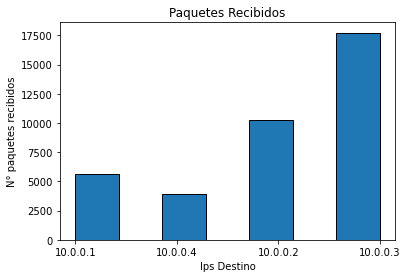

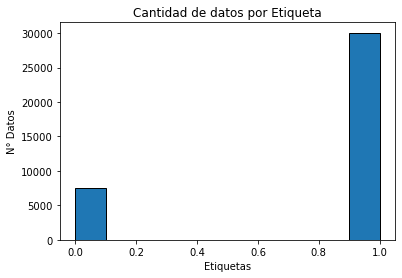

In [19]:
#Numero de interacciones de los hosts

plt.hist(dataset["ip_dst"],bins=7,edgecolor="black")
plt.xlabel("Ips Destino")
plt.ylabel("N° paquetes recibidos")
plt.title("Paquetes Recibidos")
plt.show()

plt.hist(dataset["label"],edgecolor="black")
plt.title("Cantidad de datos por Etiqueta")
plt.ylabel("N° Datos")
plt.xlabel("Etiquetas")
plt.show()

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


dataset.iloc[:, 1] = dataset.iloc[:, 1].str.replace('.', '')
dataset.iloc[:, 3] = dataset.iloc[:, 3].str.replace('.', '')
dataset.iloc[:, -2] = dataset.iloc[:,-2].str.replace(",","")

X_flow = dataset.iloc[:, :-1].values
X_flow = X_flow.astype('float32')
y_flow = dataset.iloc[:, -1].values

X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.20, random_state=0)


Matríz de Confusión minkowski con N_NEIGHBORS = 1


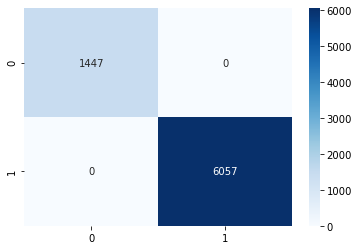

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1447
     MALIGNO       1.00      1.00      1.00      6057

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión euclidean con N_NEIGHBORS = 1


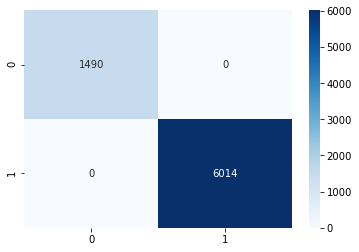

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1490
     MALIGNO       1.00      1.00      1.00      6014

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión manhattan con N_NEIGHBORS = 1


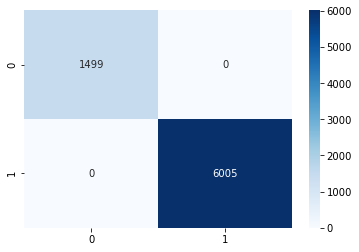

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1499
     MALIGNO       1.00      1.00      1.00      6005

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión chebyshev con N_NEIGHBORS = 1


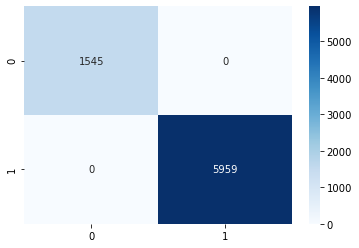

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1545
     MALIGNO       1.00      1.00      1.00      5959

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión minkowski con N_NEIGHBORS = 2


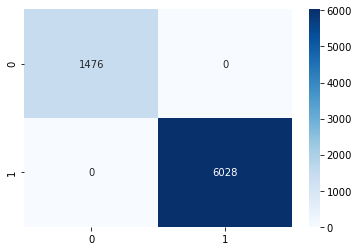

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1476
     MALIGNO       1.00      1.00      1.00      6028

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión euclidean con N_NEIGHBORS = 2


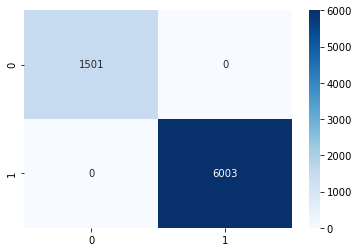

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1501
     MALIGNO       1.00      1.00      1.00      6003

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión manhattan con N_NEIGHBORS = 2


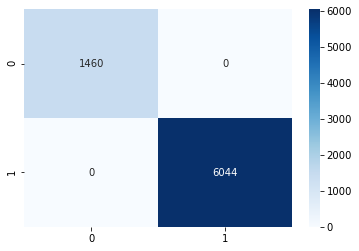

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1460
     MALIGNO       1.00      1.00      1.00      6044

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión chebyshev con N_NEIGHBORS = 2


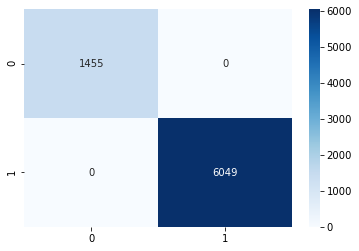

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1455
     MALIGNO       1.00      1.00      1.00      6049

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión minkowski con N_NEIGHBORS = 3


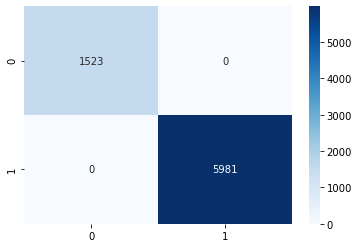

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1523
     MALIGNO       1.00      1.00      1.00      5981

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión euclidean con N_NEIGHBORS = 3


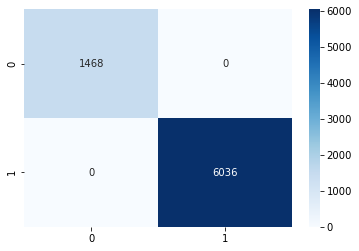

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1468
     MALIGNO       1.00      1.00      1.00      6036

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión manhattan con N_NEIGHBORS = 3


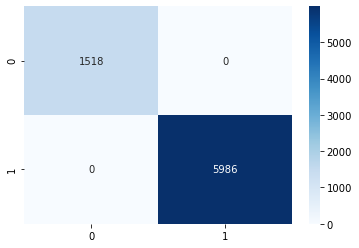

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1518
     MALIGNO       1.00      1.00      1.00      5986

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión chebyshev con N_NEIGHBORS = 3


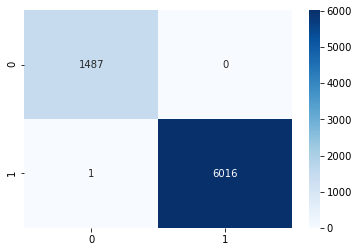

success accuracy = 99.99 %
fail accuracy = 0.01 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1487
     MALIGNO       1.00      1.00      1.00      6017

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión minkowski con N_NEIGHBORS = 4


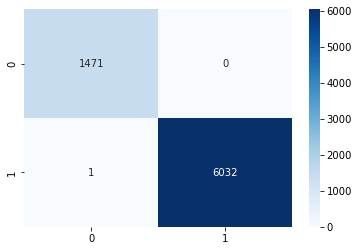

success accuracy = 99.99 %
fail accuracy = 0.01 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1471
     MALIGNO       1.00      1.00      1.00      6033

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión euclidean con N_NEIGHBORS = 4


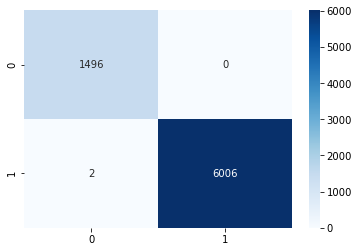

success accuracy = 99.97 %
fail accuracy = 0.03 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1496
     MALIGNO       1.00      1.00      1.00      6008

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión manhattan con N_NEIGHBORS = 4


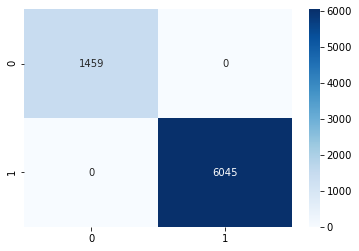

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1459
     MALIGNO       1.00      1.00      1.00      6045

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión chebyshev con N_NEIGHBORS = 4


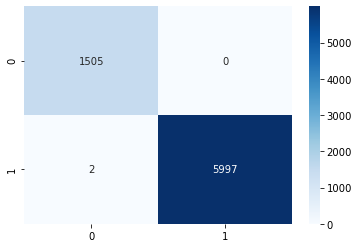

success accuracy = 99.97 %
fail accuracy = 0.03 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1505
     MALIGNO       1.00      1.00      1.00      5999

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión minkowski con N_NEIGHBORS = 5


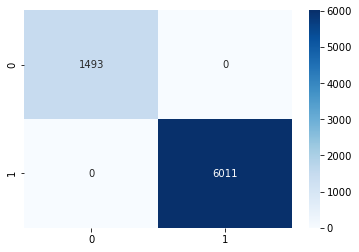

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1493
     MALIGNO       1.00      1.00      1.00      6011

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión euclidean con N_NEIGHBORS = 5


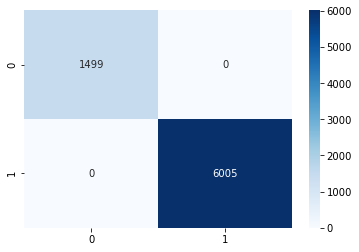

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1499
     MALIGNO       1.00      1.00      1.00      6005

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión manhattan con N_NEIGHBORS = 5


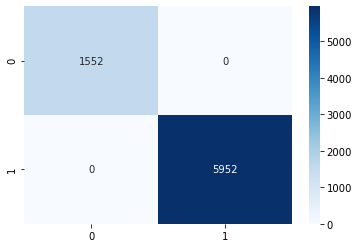

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1552
     MALIGNO       1.00      1.00      1.00      5952

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión chebyshev con N_NEIGHBORS = 5


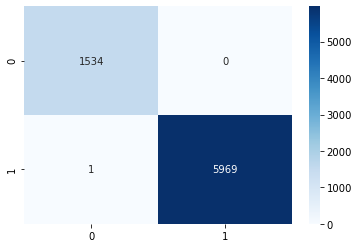

success accuracy = 99.99 %
fail accuracy = 0.01 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1534
     MALIGNO       1.00      1.00      1.00      5970

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión minkowski con N_NEIGHBORS = 6


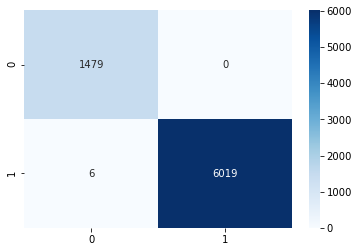

success accuracy = 99.92 %
fail accuracy = 0.08 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1479
     MALIGNO       1.00      1.00      1.00      6025

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión euclidean con N_NEIGHBORS = 6


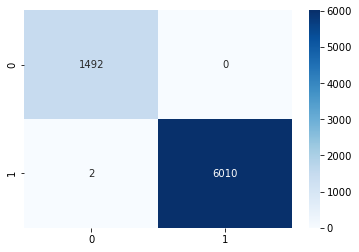

success accuracy = 99.97 %
fail accuracy = 0.03 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1492
     MALIGNO       1.00      1.00      1.00      6012

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión manhattan con N_NEIGHBORS = 6


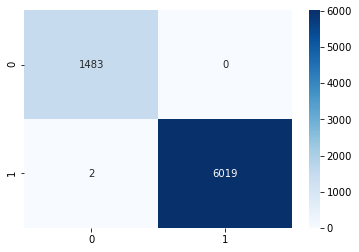

success accuracy = 99.97 %
fail accuracy = 0.03 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1483
     MALIGNO       1.00      1.00      1.00      6021

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión chebyshev con N_NEIGHBORS = 6


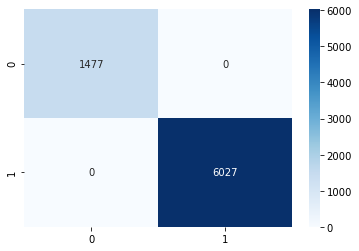

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1477
     MALIGNO       1.00      1.00      1.00      6027

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión minkowski con N_NEIGHBORS = 7


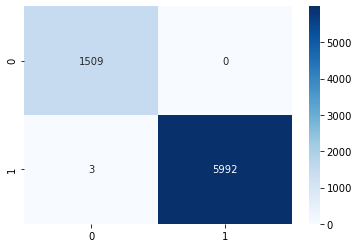

success accuracy = 99.96 %
fail accuracy = 0.04 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1509
     MALIGNO       1.00      1.00      1.00      5995

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión euclidean con N_NEIGHBORS = 7


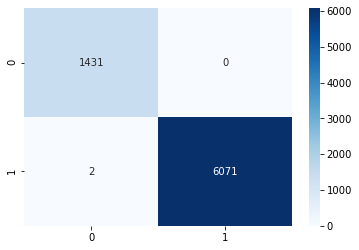

success accuracy = 99.97 %
fail accuracy = 0.03 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1431
     MALIGNO       1.00      1.00      1.00      6073

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión manhattan con N_NEIGHBORS = 7


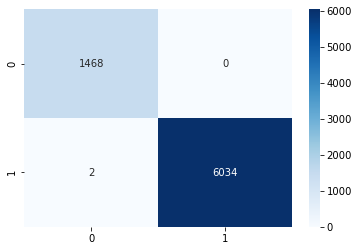

success accuracy = 99.97 %
fail accuracy = 0.03 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1468
     MALIGNO       1.00      1.00      1.00      6036

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504

Matríz de Confusión chebyshev con N_NEIGHBORS = 7


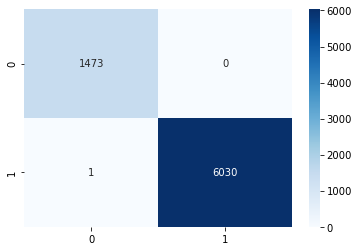

success accuracy = 99.99 %
fail accuracy = 0.01 %
------------------------------------------------------------------------

 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1473
     MALIGNO       1.00      1.00      1.00      6031

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504



In [22]:
metrics = ['minkowski','euclidean','manhattan','chebyshev']
for i in range(1,8):
      for metric in metrics:
        X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.2, shuffle=True)
        classifier = KNeighborsClassifier(n_neighbors=i, metric=metric)
        flow_model = classifier.fit(X_flow_train, y_flow_train)
        y_flow_pred = flow_model.predict(X_flow_test)
        print(f"Matríz de Confusión {metric} con N_NEIGHBORS = {i}")
        cm = confusion_matrix(y_flow_test, y_flow_pred)

        sns.heatmap(cm, annot=True, 
                  cmap='Blues', fmt='d')
        plt.show()

        acc = accuracy_score(y_flow_test, y_flow_pred)

        print("success accuracy = {0:.02f} %".format(acc*100))
        fail = 1.0 - acc
        print("fail accuracy = {0:.02f} %".format(fail*100))
        print("------------------------------------------------------------------------")
        print("")
        print(" ")
        print('Classification Report')
        target_names = list(['BENIGNO','MALIGNO'])
        print('')
        print(classification_report(y_flow_test, y_flow_pred, target_names=target_names))

